In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patheffects as pe
from adjustText import adjust_text

In [8]:
df = pd.read_html("https://fbref.com/en/squads/b8fd03ef/2021-2022/all_comps/Manchester-City-Stats-All-Competitions", header=1)[0]
df["Min_pct"] = 100*df["90s"]/58 ##number of matches in a league season
df = df.dropna(subset=["Age", "Min_pct"])
df = df.loc[:len(df)-1, :]
df[["Player", "Pos", "Age", "Min_pct"]].head()

,Player,Pos,Age,Min_pct
0,João Cancelo,DF,27,89.137931
1,Ederson,GK,27,84.655172
2,Bernardo Silva,"MF,FW",26,75.517241
3,Rodri,MF,25,75.172414
4,Aymeric Laporte,DF,27,71.724138


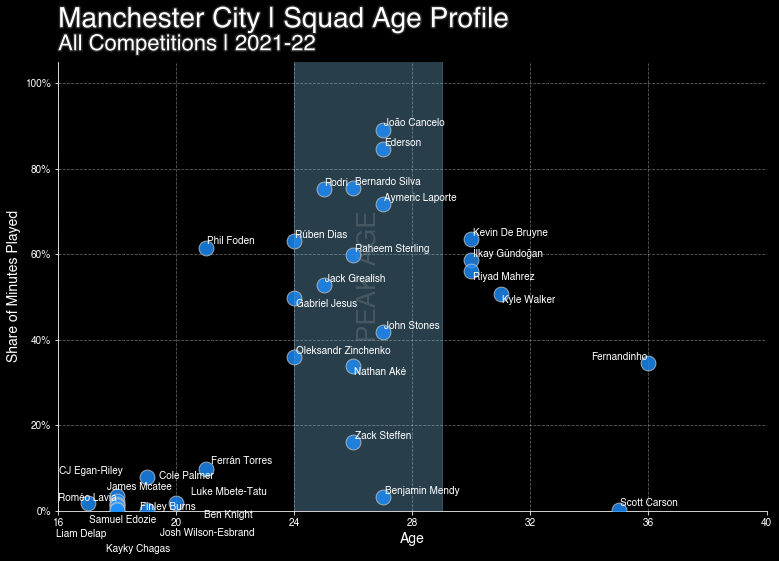

In [12]:
line_color = "silver"
marker_color = "dodgerblue"

with plt.style.context("dark_background"):
    plt.rcParams['font.family'] = 'Helvetica' ##set global font

    fig, ax = plt.subplots(figsize=(12, 8)) 
    
    ax.scatter(df["Age"], df["Min_pct"], s=220, zorder=10, 
               ec=line_color, fc=marker_color, alpha=0.8) ##scatter points
    ax.fill([24, 29, 29, 24], [-6, -6, 106, 106], color='lightskyblue',
            alpha=0.3, zorder=2) ##the peak age shaded region
    ax.text(26.5, 55, "PEAK AGE", color=line_color, zorder=3, 
            alpha=0.2, fontsize=26, rotation=90, ha='center',
            va='center', fontweight='bold') ## `PEAK` age text
    
    texts = [] ##plot player names
    for row in df.itertuples():
        texts.append(ax.text(row.Age, row.Min_pct, row.Player, fontsize=10, ha='center', va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
    
    ## update plot
    ax.set(xlabel="Age", ylabel="Share of Minutes Played", ylim=(0, 105), xlim=(16, 40)) ## set labels and limits
    
    ##grids and spines
    ax.grid(color=line_color, linestyle='--', linewidth=0.8, alpha=0.5)   
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
        ax.spines[spine].set_color(line_color)
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.xaxis.set_ticks(range(16, 44, 4)) ##fix the tick frequency 
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels
    
    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    ## title and subtitle
    fig.text(x=0.08, y=0.92, s="Manchester City | Squad Age Profile", 
            ha='left', fontsize=28, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()]) 
    fig.text(x=0.08, y=0.88, s="All Competitions | 2021-22", ha='left', 
            fontsize=22, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("mancity-squad-age-profile", dpi=180)   